无监督学习的主要应用场景之一就是市场细分。    
此项目将与一个零售商和他的客户打交道，对数据表wholesale.csv中的数据进行分析。
数据表中包含了不同类型商品的销售数据，目标是找到数据集群，从而为客户提供最优的销售和分销策略

Number of clusters in input data =  8

Centroids of clusters:
['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Fre	Mil	Gro	Fro	Det	Del
9632	4671	6593	2570	2296	1248
40204	46314	57584	5518	25436	4241
112151	29627	18148	16745	4948	8550
36847	43950	20170	36534	239	47943
32717	16784	13626	60869	1272	5609
22925	73498	32114	987	20070	903
16117	46197	92780	1026	40827	2944
8565	4980	67298	131	38102	1215


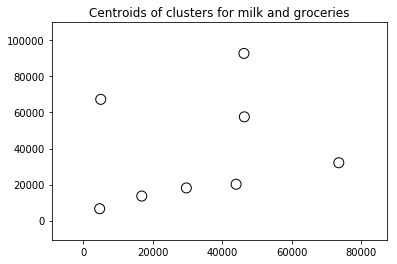

In [13]:
import csv

import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# 加载数据
def csv_read(input_file):
    import csv
    file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
    X = []
    for count, row in enumerate(file_reader):
        if not count:
            names = row[2:]
            continue
        X.append([float(x) for x in row[2:]])
    X = np.array(X)
    return X,names

# 均值漂移模型
def meanshift(data):
    # 通过指定输入参数创建一个均值漂移模型
    # 设置带宽参数bandwidth
    bandwidth = estimate_bandwidth(data,quantile=0.8,n_samples=len(data))
    # 这一方法会根据quantile比例的最大近邻距离，估算出整个数据集的平均最大近邻距离。默认这里的quantile是0.3,取值范围在[0,1]

    # MeanShift计算聚类
    meanshift_estimator = MeanShift(bandwidth=bandwidth,bin_seeding=True)

    # 训练模型
    meanshift_estimator.fit(data)
    
    return meanshift_estimator

    
X,names = csv_read('wholesale.csv')
meanshift_estimator = meanshift(X)

# 提取标记
labels = meanshift_estimator.labels_

# 从模型中提取集群的中心点，然后打印集群数量
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))
print("Number of clusters in input data = ",num_clusters)

# 打印获得的集群中心
print("\nCentroids of clusters:")
print('\t'.join([name[:3] for name in names]))
for centroid in centroids:
    print('\t'.join([str(int(x)) for x in centroid]))
    
    
# 把两个特征(milk和groceries)的聚类结果可视化
# 数据可视化
centroids_milk_groceries = centroids[:, 1:3]
# 用centroids_milk_groceries中的坐标画出中心点
plt.figure()
plt.scatter(centroids_milk_groceries[:,0], centroids_milk_groceries[:,1], 
        s=100, edgecolors='k', facecolors='none')

offset = 0.2
# numpy.ptp() 该函数返回沿轴的值的范围（最大值– 最小值）
plt.xlim(centroids_milk_groceries[:,0].min() - offset * centroids_milk_groceries[:,0].ptp(),
        centroids_milk_groceries[:,0].max() + offset * centroids_milk_groceries[:,0].ptp(),)
plt.ylim(centroids_milk_groceries[:,1].min() - offset * centroids_milk_groceries[:,1].ptp(),
        centroids_milk_groceries[:,1].max() + offset * centroids_milk_groceries[:,1].ptp())

plt.title('Centroids of clusters for milk and groceries')
plt.show()

